# Análise de Componentes Principais usando a biblioteca **eofs**

A biblioteca **eofs**, disponível em https://ajdawson.github.io/eofs/latest/, permite o cálculo da Análise de Componentes Principais a partir de campos geofísicos.

A biblioteca possui diferentes intefaces que permitem a retenção e manipulção dos metadados, ou seja, das coordenadas e atributos dos dados. Abaixo, usaremos a interface para a biblioteca **xarray**, pois ela é muito usada com dados meteorológicos.

Aqui, replicamos o exemplo da biblioteca **eofs**, adicionando alguns blocos a mais, com o objetivo de relacionar a teoria e a prática.



Prof. Mateus da Silva Teixeira

Disciplina de Métodos Multivariados para Meteorologia e Climatologia

Programa de Pós-Graduação em Meteorologia / UFPel

In [14]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import eofs    # Detalhes em https://ajdawson.github.io/eofs/latest/; precisa de NumPy inferior a 2.0
import matplotlib.pyplot as plt

In [16]:
# carregando os dados de TSM para o Oceano Pacífico
dados = xr.open_dataset('sst_ndjfm_anom.nc')
tsm = dados.sst
print(tsm)

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)>
[27000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1963-01-15T12:00:00 ... 2012-01-16
  * latitude   (latitude) float32 -22.5 -17.5 -12.5 -7.5 ... 47.5 52.5 57.5 62.5
  * longitude  (longitude) float32 117.5 122.5 127.5 132.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      NDJFM mean SST anomalies


A aplicação da ACP se dá a partir da aplicação da *classe* **Eof**. Essa classe cria um objeto do tipo **Eof**, que contém as informações relacionadas à ACP: autovalores, autovetores. Essas informações são acessadas a partir de métodos (funções) específicos. A linha abaixo realiza o cálculo da ACP aos dados de TSM.

In [20]:
ACP = eofs.xarray.Eof( tsm )

Os autovalores são obtidos pela função **eigenvalues()**. Perceba que, devido à interface para a biblioteca **xarray**, a função retorna os autovalores em um *DataArray*.

In [21]:
# autovalores
autovals = ACP.eigenvalues()
print(autovals)

<xarray.DataArray 'eigenvalues' (mode: 50)>
array([6.04508073e+01, 1.73071607e+01, 9.96924385e+00, 9.28291120e+00,
       5.80943094e+00, 3.97210716e+00, 3.02104851e+00, 2.86120977e+00,
       2.44229287e+00, 1.83051287e+00, 1.48695193e+00, 1.40110812e+00,
       1.17392424e+00, 1.04569778e+00, 9.66454355e-01, 8.78544912e-01,
       7.37808715e-01, 6.80884631e-01, 6.41725705e-01, 5.94347969e-01,
       5.34377708e-01, 4.93939102e-01, 4.03652014e-01, 3.94794953e-01,
       3.74301345e-01, 2.94369602e-01, 2.80962136e-01, 2.50262724e-01,
       2.18057126e-01, 2.01798980e-01, 1.77016365e-01, 1.60955927e-01,
       1.44477784e-01, 1.29847678e-01, 1.10823438e-01, 1.05025649e-01,
       9.30232394e-02, 8.62991409e-02, 7.01941575e-02, 5.97873369e-02,
       5.75210439e-02, 3.87002625e-02, 3.53702338e-02, 3.24846858e-02,
       2.42698416e-02, 1.89963875e-02, 1.70719994e-02, 1.27187810e-02,
       1.10501795e-02, 1.19218196e-29])
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 ... 4

A fração da variância representada por cada CP é obtida pela função **varianceFraction()**. Ela basicamente, implementa a equação:

$$
R^2_m = \frac{\lambda_m}{\sum^K_{k=1} \lambda_k}\times100\% = \frac{\lambda_m}{\sum^K_{k=1} s_{k,k}}\times100\%
$$

Experimente realizar esse cálculo manualmente e comparar com os resultados da função, abaixo.

In [22]:
R2 = ACP.varianceFraction()
print(R2)

<xarray.DataArray 'variance_fractions' (mode: 50)>
array([4.60099695e-01, 1.31727263e-01, 7.58773333e-02, 7.06535579e-02,
       4.42164054e-02, 3.02322727e-02, 2.29936300e-02, 2.17770747e-02,
       1.85886385e-02, 1.39322939e-02, 1.13174027e-02, 1.06640332e-02,
       8.93490438e-03, 7.95895457e-03, 7.35582159e-03, 6.68673031e-03,
       5.61556710e-03, 5.18230980e-03, 4.88426564e-03, 4.52366695e-03,
       4.06722476e-03, 3.75944078e-03, 3.07225291e-03, 3.00484056e-03,
       2.84886079e-03, 2.24048892e-03, 2.13844279e-03, 1.90478520e-03,
       1.65966381e-03, 1.53592075e-03, 1.34729674e-03, 1.22505846e-03,
       1.09964097e-03, 9.88289153e-04, 8.43492952e-04, 7.99365157e-04,
       7.08013109e-04, 6.56835039e-04, 5.34257719e-04, 4.55049927e-04,
       4.37800848e-04, 2.94553204e-04, 2.69207882e-04, 2.47245565e-04,
       1.84721218e-04, 1.44584208e-04, 1.29937416e-04, 9.68044514e-05,
       8.41044882e-05, 9.07386654e-32])
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 

O gráfico **autovalores** *vs* **CP** permite avaliar quão importante cada CP principal é, em termos da representação da variabilidade total dos dados. Inclusive, é uma ferramenta na decisão de quantas CP podem ser retidas para posterior investigação.

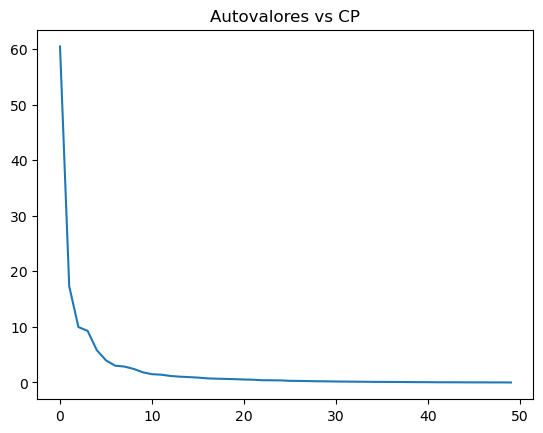

In [25]:
plt.plot(autovals)
plt.title('Autovalores vs CP')
plt.show()

# EOFs como correlações

Historicamente, e na Meteorologia, os autovetores são referidos como *Empirical Orthogonal Functions* (EOF) devido a sua similaridade com as funções ortogonais teóricas usadas na Análise de Séries de Fourier.

É importante destacar que aqui, os elementos dos autovetores serão expressados como correlações entre as CP e as variáveis originais. Não está relacionado com a realização da ACP a partir das anomalias padronizadas, que levaria a uma matriz de correlação. **É muito importante ter esse aspecto bastante claro!!!**

Tanto os autovetores obtidos da ACP aplicada à matriz de correlações, quanto à matriz de covariâncias, podem ser expressados como correlação entre as CP e as variáveis originais, sejam elas anomalias padronizadas ou apenas anomalias, respectivamente.

In [10]:
eof1_R = solver.eofsAsCorrelation( neofs=1 )
pc1_R  = solver.pcs( npcs=1, pcscaling=1 )

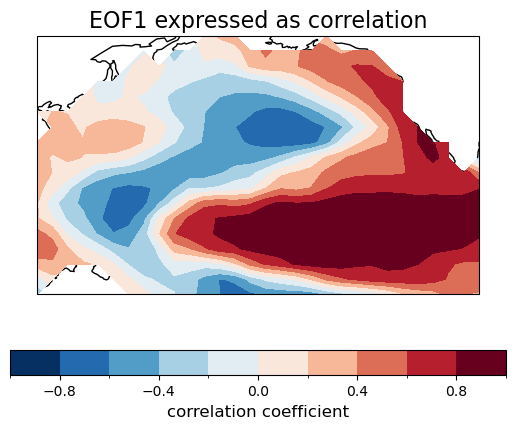

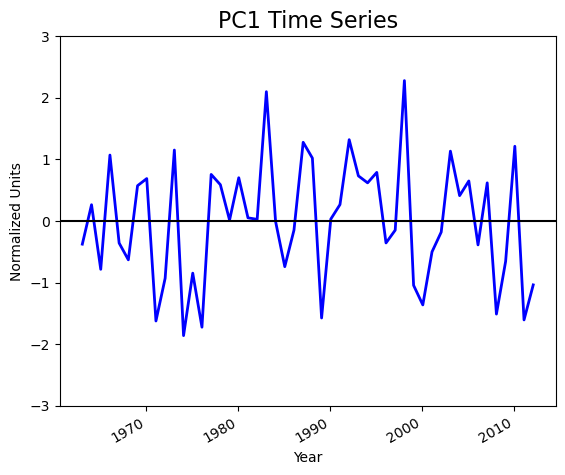

In [11]:
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1_R[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
pc1_R[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

# EOFs como covariâncias

In [12]:
eof1_S = solver.eofsAsCovariance( neofs=1 )
pc1_S  = solver.pcs( npcs=1, pcscaling=1 )

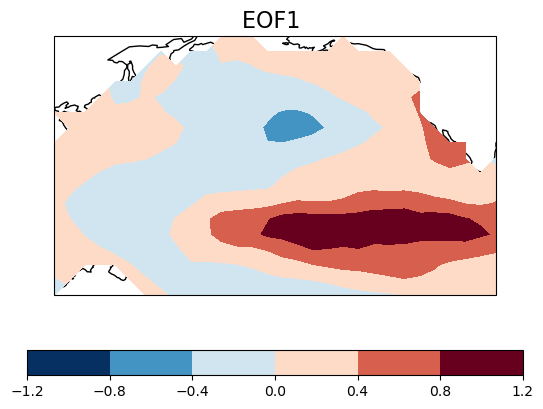

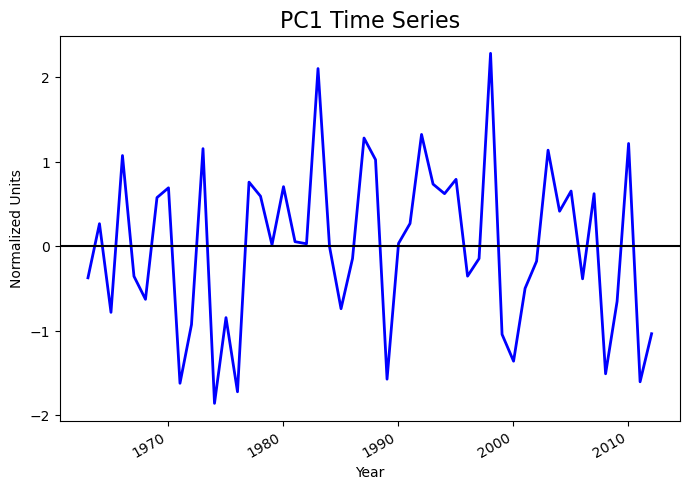

In [13]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1_S[0].plot.contourf(ax=ax,
                               cmap=plt.cm.RdBu_r,
                               add_colorbar=False,
                               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
ax.set_title('EOF1 ', fontsize=16)

# Plot the leading PC time series.
plt.figure(figsize=(8,5))
pc1_S[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
#ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()